# Geometric shape Detection using contours
Detection of polygons using contours and approxPolyDP functions from openCV

In [1]:
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt

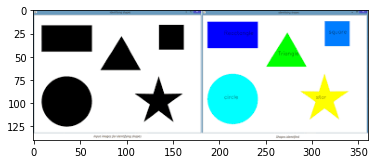

In [15]:
#Reading the image
default_file = 'farm_img.jpeg'

img = cv2.imread('shapes.png')

#Checking if image is loaded fine
if img is None:
    print('Error opening image!')
    print('Usage: hough_lines.py [image_name -- default ' + default_file + '] \n') 
plt.imshow(img)

In [ ]:
imgGry = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret , thrash = cv2.threshold(imgGry, 240 , 255, cv2.CHAIN_APPROX_NONE)
contours , hierarchy = cv2.findContours(thrash, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)


for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.01* cv2.arcLength(contour, True), True)
    cv2.drawContours(img, [approx], 0, (0, 0, 0), 5)
    x = approx.ravel()[0]
    y = approx.ravel()[1] - 5

    if len(approx) == 3:
        cv2.putText( img, "Triangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0) )
    elif len(approx) == 4 :
        x, y , w, h = cv2.boundingRect(approx)
        aspectRatio = float(w)/h
        print(aspectRatio)
        if aspectRatio >= 0.95 and aspectRatio < 1.05:
            cv2.putText(img, "square", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
            
        else:
            cv2.putText(img, "rectangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
            
    elif len(approx) == 5 :
        cv2.putText(img, "pentagon", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
        
    elif len(approx) == 10 :
        cv2.putText(img, "star", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
     
    else:
        cv2.putText(img, "circle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

cv2.imshow('shapes', img)
cv2.waitKey(0)
cv2.destroyAllWindows()



2.7142857142857144
1.390625
1.037037037037037
1.8333333333333333
1.40625
1.037037037037037
1.896551724137931
1.0
1.0
